# Import libraries

In [1]:
! pip install squarify 
#(algorithm for treemap)

In [55]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px
import squarify

# Datetime date 
import datetime as dt

# deal with float 
import math

# Importing Data Set

In [3]:
data = pd.read_csv("dataset_for_analyst_assignment_20201120.csv")

# Exploratory Data Analysis 

## 1. The goal 
RFM Analysis
- For Recency, calculate the number of days between present date and date of last purchase each customer.
- For Frequency, calculate the number of orders for each customer or average days between purchase
- For Monetary, calculate the sum of purchase price for each customer.

To be able to conduct RFM analysis, we need to validate data and create new variable if needed: 
- Check missing values in important columns
    - REGISTRATION_DATE
    - USER_ID 
    - LAST_PURCHASE_DATE
    - AVG_DAYS_BETWEEN_PURCHASES/TOTAL_PURCHASES_EUR	
- Customer's distribution in each country
- Total purchase value in euro > 0 
- The last purchase date < 0 today 


## 2 Understanding the big picture 

In [4]:
data.dropna() # Drop the rows whose all columns contain Null values 
data.head().style #add .style to show all columns (otherwise some columns will be hidden with "...")

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,nan,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,ios,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,"{ ""General merchandise"": 0, ""Grocery"": 0, ""Pet supplies"": 0, ""Restaurant"": 0, ""Retail store"": 0 }"
1,2019-09-01 00:00:00.000,FIN,1,1.000000,0.000000,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.000000,1.000000,0.000000,0.000000,0.000000,38.456000,1.000000,38.532000,38.608000,38.456000,android,0.000000,0.000000,1.000000,nan,0,23.000000,2.000000,nan,nan,6.853000,"{ ""General merchandise"": 0, ""Grocery"": 0, ""Pet supplies"": 0, ""Restaurant"": 1, ""Retail store"": 0 }"
2,2019-09-01 00:00:00.000,DNK,19,19.000000,0.000000,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.000000,4.000000,1.000000,14.000000,0.000000,631.488000,9.000000,20.280000,43.688000,33.396000,android,0.000000,19.000000,0.000000,nan,1,21.000000,2.000000,9.000000,3.000000,6.559000,"{ ""General merchandise"": 1, ""Grocery"": 9, ""Pet supplies"": 0, ""Restaurant"": 9, ""Retail store"": 0 }"
3,2019-09-01 00:00:00.000,FIN,0,nan,nan,nan,nan,4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,android,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,"{ ""General merchandise"": 0, ""Grocery"": 0, ""Pet supplies"": 0, ""Restaurant"": 0, ""Retail store"": 0 }"
4,2019-09-01 00:00:00.000,GRC,0,nan,nan,nan,nan,5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,android,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,"{ ""General merchandise"": 0, ""Grocery"": 0, ""Pet supplies"": 0, ""Restaurant"": 0, ""Retail store"": 0 }"


In [5]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028

In [6]:
# Count the number of unique values/ customers - Any duplicates?  
data['USER_ID'].nunique()

21983

Observation 

- The dataframe has 30 columns with 21,983 rows representing the history purchase information of 21,983 customers since September 2019 till October 2020. 

### 2.1 Check NULL (missing) values and abnormal values

In [7]:
pd.DataFrame(data.isnull().sum(), columns=['#Null values'])

,#Null values
REGISTRATION_DATE,0
REGISTRATION_COUNTRY,0
PURCHASE_COUNT,0
PURCHASE_COUNT_DELIVERY,9955
PURCHASE_COUNT_TAKEAWAY,9955
FIRST_PURCHASE_DAY,10019
LAST_PURCHASE_DAY,9956
USER_ID,0
BREAKFAST_PURCHASES,9955
LUNCH_PURCHASES,9955


Observation

- There is no missing values in USER_ID 
- There are 9956 missing values in the colummn LAST_PURCHASE_DAY and 9955 in AVG_PURCHASE_VALUE_EUR, which is used to calculate Recency and Frecency score, and thus must be removed.
- There are 9955 users who had registered but have not made any purchse yet and thus there are no information about their purchasing behaviors. We will remove them from the dataframe for better analysis. 

### 2.2 Some descriptive statistics

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PURCHASE_COUNT,21983.0,3.345358,8.523171,0.000,0.0000,1.000,3.000,320.000
PURCHASE_COUNT_DELIVERY,12028.0,5.741686,10.536220,0.000,1.0000,2.000,6.000,320.000
PURCHASE_COUNT_TAKEAWAY,12028.0,0.372464,1.416310,0.000,0.0000,0.000,0.000,44.000
USER_ID,21983.0,10992.000000,6346.089820,1.000,5496.5000,10992.000,16487.500,21983.000
BREAKFAST_PURCHASES,12028.0,0.193964,1.104067,0.000,0.0000,0.000,0.000,52.000
LUNCH_PURCHASES,12028.0,2.375042,5.626178,0.000,0.0000,1.000,2.000,171.000
EVENING_PURCHASES,12028.0,0.493432,1.827710,0.000,0.0000,0.000,0.000,71.000
DINNER_PURCHASES,12028.0,3.029016,5.238209,0.000,0.0000,1.000,3.000,104.000
LATE_NIGHT_PURCHASES,12028.0,0.000000,0.000000,0.000,0.0000,0.000,0.000,0.000
TOTAL_PURCHASES_EUR,12028.0,176.210419,299.086986,1.012,32.3840,75.900,196.328,7979.620


## 3 Preparation

### Split PURCHASE_COUNT_BY_STORE_TYPE column

In [9]:
data['PURCHASE_COUNT_BY_STORE_TYPE'] = data['PURCHASE_COUNT_BY_STORE_TYPE'].map(lambda x: eval("".join(x.split("\n"))))
data = data.join(pd.json_normalize(data.pop('PURCHASE_COUNT_BY_STORE_TYPE')))
data.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,General merchandise,Grocery,Pet supplies,Restaurant,Retail store
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,23.0,2.0,NaN,NaN,6.853,0,0,0,1,0
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,21.0,2.0,9.0,3.0,6.559,1,9,0,9,0
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


### Extract users who has made at least one purchase 

In [10]:
# Remove the user who has not purchased yet and missing last Purchase Date
df1 = pd.DataFrame.copy(data)
df1 = df1.query("PURCHASE_COUNT > 0 and LAST_PURCHASE_DAY.notnull()")

### Add new variables/calculation

* Recency =  The day after the last date an user made purchase(s) - The last purchase date of each user
* Frequency = Number of order
* Monetary Value = AVG Purchase Value EUR

In [11]:
df1['LAST_PURCHASE_DAY'].min()

'2019-09-01 00:00:00.000'

In [12]:
df1['LAST_PURCHASE_DAY'].max()

'2020-10-31 00:00:00.000'

In [13]:
# Since recency is calculated for a point in time, and the last purchase date is 2010–10–31, we will use 2010–10–31 to calculate recency.
NOW = dt.datetime(2020,11,1)
df1['LAST_PURCHASE_DAY'] = pd.to_datetime(df1['LAST_PURCHASE_DAY'])

### RFM Score Calculation

In [14]:
rfmTable = df1.groupby('USER_ID').agg({'LAST_PURCHASE_DAY': lambda x: (NOW - x).dt.days, 'PURCHASE_COUNT': lambda x: x, 'AVG_PURCHASE_VALUE_EUR': lambda x:x})
rfmTable['LAST_PURCHASE_DAY'] = rfmTable['LAST_PURCHASE_DAY'].astype(int)
rfmTable.rename(columns={'LAST_PURCHASE_DAY': 'Recency', 
                         'PURCHASE_COUNT': 'Frequency', 
                         'AVG_PURCHASE_VALUE_EUR': 'Monetary_Value'}, inplace=True)

In [15]:
#rfmTable.sort_values(by=["Frequency"])
rfmTable.describe()

,Recency,Frequency,Monetary_Value
count,12027.000000,12027.000000,12027.000000
mean,196.037166,6.114576,31.194456
std,160.544216,10.763410,20.717298
min,1.000000,1.000000,1.012000
25%,35.000000,1.000000,19.228000
50%,163.000000,3.000000,27.324000
75%,387.000000,6.000000,38.456000
max,427.000000,320.000000,657.800000


### Quantiles of RFM Values for User Segmentation

In [16]:
# Quantiles of RFM Values to split metrics
quantiles = rfmTable.quantile(q=[0.2,0.4,0.6,0.8])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.2: 23.0, 0.4: 96.0, 0.6: 243.0, 0.8: 401.0},
 'Frequency': {0.2: 1.0, 0.4: 2.0, 0.6: 4.0, 0.8: 8.0},
 'Monetary_Value': {0.2: 18.216, 0.4: 24.288, 0.6: 31.372, 0.8: 41.492}}

In [35]:
# Create function to help rank customer based on their RFM score
def Recency_Score(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5
    
def FM_Score(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]:
        return 2
    else:
        return 1

In [18]:
# Add individual RFM score
rfmTable['r_quartile'] = rfmTable['Recency'].apply(Recency_Score, args=('Recency',quantiles,))
rfmTable['f_quartile'] = rfmTable['Frequency'].apply(FM_Score, args=('Frequency',quantiles,))
rfmTable['m_quartile'] = rfmTable['Monetary_Value'].apply(FM_Score, args=('Monetary_Value',quantiles,))
# Combine all three score into RFM Score 
rfmTable['RFM_Score'] = rfmTable.r_quartile.map(str) + rfmTable.f_quartile.map(str) + rfmTable.m_quartile.map(str)
rfmTable.reset_index(inplace = True)
rfmTable.head()

,USER_ID,Recency,Frequency,Monetary_Value,r_quartile,f_quartile,m_quartile,RFM_Score
0,2,60,1,38.456,2,5,2,252
1,3,160,19,33.396,3,1,2,312
2,8,18,1,19.228,1,5,4,154
3,13,5,19,31.372,1,1,3,113
4,14,53,2,59.708,2,4,1,241


#### The plots made by using Plotly sometimes do not be rendered in Jupyter Notebook. If the plots do not appear, please use the cell below for RFM distribution with seaborn. Convert it to Code before running
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y = rfmTable['Recency']),row=1, col=1)
fig.add_trace(go.Box(y = rfmTable['Frequency']),row=1, col=2)
fig.add_trace(go.Box(y = rfmTable['Monetary_Value']),row=1, col=3)

fig.update_layout(height=600, width=600, title_text="Side By Side Subplots")
fig.show()

### 3.5 Result Interpretion 

In [36]:
# Segment 1 - Best Users (Lowest Recency Score, Highest Frequency, Highest Monetary Value) RFM Score = '111'
# Segment 2 - Potential Loyalists (Recent customers but spent a good amount and bought more than once.) R_Score = 1, F_Score = 2-3, M_Score = 2-3
# Segment 3 - New Users (Purchase quite recently but not often one or twice) F_Score = 5 or 4, R_Score = 1, M_Score = 1-5
# Segment 4 - At-risk Users (Purchase often and spent big amounts but not recently) R_Score = 2, F_score = 1-2, M_Score = 1
# Segment 5 - Can't lose them (Used to purchase quite often but have not revently) R_Score = 3, F_Score = 1-2, M_score = 1-5
rfmTable["USER_SEGMENT"] = np.nan
condlist = [
    rfmTable['RFM_Score'].str.contains('111', case=False, regex=True),
    rfmTable['RFM_Score'].str.contains(('1[2-3][2-3]'), case=False, regex=True),
    rfmTable['RFM_Score'].str.contains(('1[4-5][1-5]'), case=False, regex=True),
    rfmTable['RFM_Score'].str.contains(('2[1-2]1'), case=False, regex=True),
    rfmTable['RFM_Score'].str.contains(('3[1-2][1-5]'), case=False, regex=True),
    rfmTable['RFM_Score'].isnull()
]
choicelist = ['Best User', 'Potential Loyalist', 'New User', 'At-risk User', "Can't lose them", "Others"]
rfmTable['USER_SEGMENT'] = np.select(condlist, choicelist)
rfmTable['USER_SEGMENT'].replace('0', 'Others', inplace=True)

In [37]:
# Add RFM Score and User segment to the table to start analysing characteristics of each user segment
RFM_df = pd.merge(rfmTable[["USER_ID","RFM_Score", 'USER_SEGMENT',"Monetary_Value"]],data)
RFM_df.head().style

,USER_ID,RFM_Score,USER_SEGMENT,Monetary_Value,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,MIN_PURCHASE_VALUE_EUR,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,PREFERRED_DEVICE,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,General merchandise,Grocery,Pet supplies,Restaurant,Retail store
0,2,252,Others,38.456000,2019-09-01 00:00:00.000,FIN,1,1.000000,0.000000,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,0.000000,1.000000,0.000000,0.000000,0.000000,38.456000,1.000000,38.532000,38.608000,38.456000,android,0.000000,0.000000,1.000000,nan,0,23.000000,2.000000,nan,nan,6.853000,0,0,0,1,0
1,3,312,Can't lose them,33.396000,2019-09-01 00:00:00.000,DNK,19,19.000000,0.000000,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,0.000000,4.000000,1.000000,14.000000,0.000000,631.488000,9.000000,20.280000,43.688000,33.396000,android,0.000000,19.000000,0.000000,nan,1,21.000000,2.000000,9.000000,3.000000,6.559000,1,9,0,9,0
2,8,154,New User,19.228000,2019-09-01 00:00:00.000,FIN,1,1.000000,0.000000,2020-10-14 00:00:00.000,2020-10-14 00:00:00.000,0.000000,0.000000,1.000000,0.000000,0.000000,19.228000,1.000000,19.266000,19.304000,19.228000,android,0.000000,0.000000,1.000000,nan,1,5.000000,1.000000,nan,nan,1.251000,0,0,0,1,0
3,13,113,Others,31.372000,2019-09-01 00:00:00.000,FIN,19,19.000000,0.000000,2020-04-18 00:00:00.000,2020-10-27 00:00:00.000,0.000000,8.000000,0.000000,11.000000,0.000000,587.972000,3.000000,19.266000,47.752000,31.372000,ios,19.000000,0.000000,0.000000,nan,1,7.000000,3.000000,11.000000,9.000000,3.303000,1,9,0,9,0
4,14,241,Others,59.708000,2019-09-01 00:00:00.000,FIN,2,2.000000,0.000000,2020-08-21 00:00:00.000,2020-09-09 00:00:00.000,0.000000,1.000000,1.000000,0.000000,0.000000,118.404000,1.000000,57.798000,60.960000,59.708000,ios,0.000000,0.000000,2.000000,"[ ""american"" ]",0,5.000000,6.000000,19.000000,19.000000,1.382000,0,0,0,2,0


## 4. Data Visualisation

In [21]:
#colors = ["#DAF7A6", "#FFC300", "#FF5733", "#C70039", "#900C3F", "#581845"]
colors = ["#494949", "#477797", "#77c6fc", "#bbe3fe", "#ddf1fe"]
font_color = '#494949'

### Recency, Frequency, Monetary Value distribution

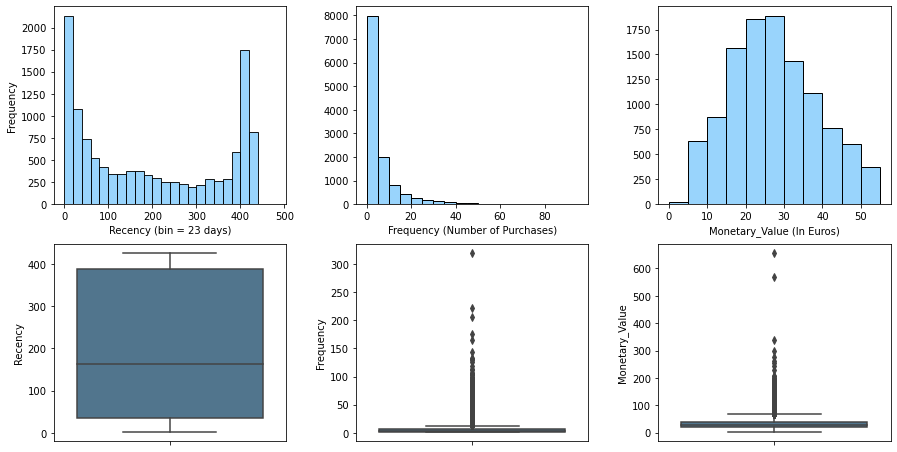

In [84]:
# initialize figure with 3 subplots in a row
df = rfmTable.loc()
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# add padding between the subplots
plt.subplots_adjust(wspace=0.3) 

# draw boxplot for Recency in the 1st subplot
sns.histplot(data=rfmTable, x="Recency", ax=ax[0,0], bins=range(0, 500, 20), color = colors[2] )
sns.boxplot(y=rfmTable['Recency'], ax=ax[1,0], color=colors[1])
ax[0,0].set_xlabel('Recency (bin = 23 days)')
ax[0,0].set_ylabel('Frequency')


# draw boxplot for Frequency in the 2nd subplot
sns.histplot(data=rfmTable, x="Frequency", ax=ax[0,1], bins=range(0, 100, 5), color = colors[2] )
sns.boxplot(y=rfmTable['Frequency'], ax=ax[1,1],color=colors[1])
ax[0,1].set_xlabel('Frequency (Number of Purchases)')
ax[0,1].set_ylabel('')

# draw boxplot for Monetary_Value in the 3rd subplot
sns.histplot(data=rfmTable, x="Monetary_Value", ax=ax[0,2], bins=range(0, 60, 5), color = colors[2] )
sns.boxplot(y=rfmTable['Monetary_Value'], ax=ax[1,2], color=colors[1])
ax[0,2].set_xlabel('Monetary_Value (In Euros)')
ax[0,2].set_ylabel('')

# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list

plt.show()

### 4.1 All users 

#### Purchase Count 

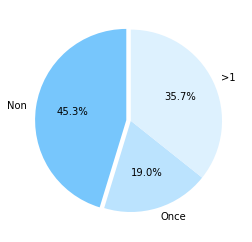

In [23]:
# create data
labels = ['Non', 'Once', '>1']
explode = (0.05,0,0)
sizes = [data[data["PURCHASE_COUNT"] == 0]["PURCHASE_COUNT"].count(),
         data[data["PURCHASE_COUNT"] == 1]["PURCHASE_COUNT"].count(),
         data[data["PURCHASE_COUNT"] > 1]["PURCHASE_COUNT"].count()]
plt.pie(sizes, labels=labels, colors=colors[2:], explode = explode, autopct='%1.1f%%',shadow=False, startangle=90)
# Show the graph
plt.tight_layout(pad = 3)
plt.show()

#### Number of user by country 

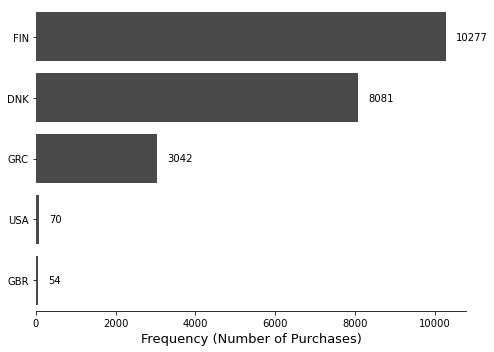

In [24]:
# Get top 5 countries by purchase_count 
df_groups = data.groupby(['REGISTRATION_COUNTRY'])['USER_ID'].count().reset_index().sort_values('USER_ID', ascending = False).head(10)
top5 = df_groups.head(5).sort_values('USER_ID', ascending = False)

fig, ax = plt.subplots(figsize=(7, 5))
barchart = sns.barplot(y = top5['REGISTRATION_COUNTRY'], x = top5['USER_ID'],ax=ax, color = colors[0], orient='h')
barchart.bar_label(ax.containers[0], label_type='edge', padding=10)

ax.set_xlabel(xlabel='Frequency (Number of Purchases)', fontsize = 13)
ax.set_ylabel(ylabel = "", )
sns.despine(left=True, bottom=False)

plt.tight_layout()

### 4.1 Total Purchase Value - No. of Users by User Segments 

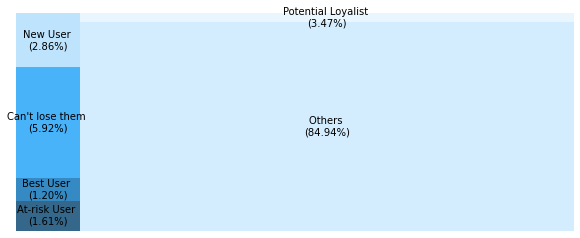

In [25]:
# Create a data frame with fake data
#df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })
colors_tree=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
c = ['#02426D','#046DB5','#1CA0F9','#ADDDFD','#C9E8FE', '#E4F4FE']
df = RFM_df.groupby('USER_SEGMENT')['USER_ID'].count().reset_index()
fig, ax = plt.subplots(figsize=(10, 4))
sizes=df['USER_ID']
label=df['USER_SEGMENT']
pcts = [f'{l} \n({s*100/sum(sizes):.2f}%)' for s,l in zip(sizes, label)]
# plot it
squarify.plot(sizes = sizes,label = pcts, alpha=.8, color = c, norm_x=80, norm_y=80 )
plt.axis('off')
plt.show()

<AxesSubplot:>

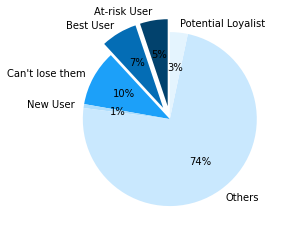

In [26]:
explode = (0.15,0.15,0,0,0,0)
RFM_df.groupby(['USER_SEGMENT'])['TOTAL_PURCHASES_EUR'].sum().plot(
    kind='pie', ylabel='', autopct='%1.0f%%', colors = c, explode = explode, startangle=90)

### 4.2 Segmented Users by Country

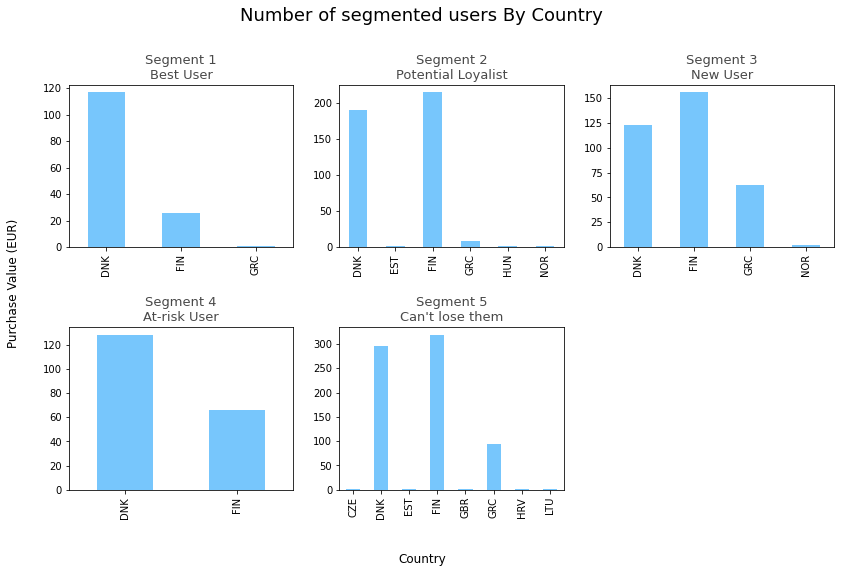

In [27]:
# Segments by Country 
fig1, axes1 = plt.subplots(figsize=(12, 8))
# add padding between the subplots
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.tick_params(left = False)
axes1.set_yticks([])
axes1.set_xticks([])
axes1.axis('off')
fig1.supylabel("Purchase Value (EUR)")
fig1.supxlabel("Country")
#fig1.supxlabel("Registration Country")
fig1.suptitle("Number of segmented users By Country", fontsize=18)
nrows, ncols = 2, 3
for i in range(0,5):
    seg = RFM_df[RFM_df['USER_SEGMENT'] == choicelist[i]]
    ax = fig1.add_subplot(nrows, ncols, i+1)
    ax.set_title(f"Segment {i+1}\n{choicelist[i]}", fontsize=13, color = font_color)
    ax = seg.groupby(['REGISTRATION_COUNTRY'])['USER_ID'].count()
    ax.plot(kind='bar', color = colors[2], xlabel = "")
plt.tight_layout(pad = 2)
plt.show()

### 4.3 PURCHASE COUNT BY WAYS OF PURCHASING

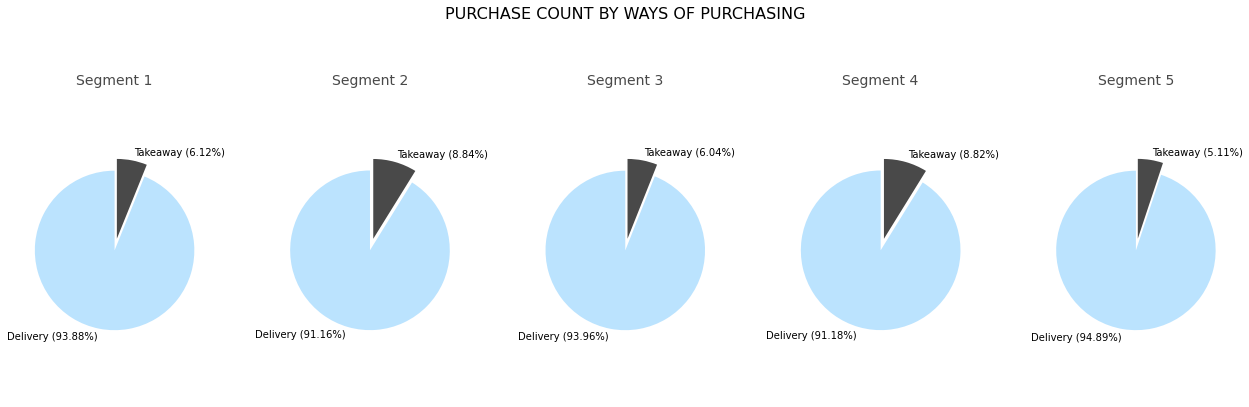

In [28]:
# Segments by Country 
fig1, axes1 = plt.subplots(figsize=(18,6))
# add padding between the suplots
plt.subplots_adjust(bottom = 0.2, hspace=0.2, wspace=0.25)
label1 =['Delivery', 'Takeaway'] 
explode1 = (0.15, 0)
axes1.set_yticks([])
axes1.set_xticks([])
axes1.axis('off')
fig1.suptitle("PURCHASE COUNT BY WAYS OF PURCHASING", fontsize=16)
nrows, ncols = 1, 5
for i in range(0,5):
    seg = RFM_df[RFM_df['USER_SEGMENT'] == choicelist[i]]
    sizes = [seg["PURCHASE_COUNT_DELIVERY"].sum(),seg["PURCHASE_COUNT_TAKEAWAY"].sum()]
    ax = fig1.add_subplot(nrows, ncols, i+1)
    pcts = [f'{l} ({s*100/sum(sizes):.2f}%)' for s,l in zip(sizes, label1)]
    ax.set_title(f"Segment {i+1}", fontsize=14, color = font_color)
    ax.pie(sizes, explode = explode1, labels=pcts,shadow=False, startangle=90, colors = (colors[3], colors[0]), textprops={'fontsize': 10} )
    ax.axis('equal')

plt.tight_layout(pad = 3)
plt.show()

### 4.4 Purchase count by meal time 

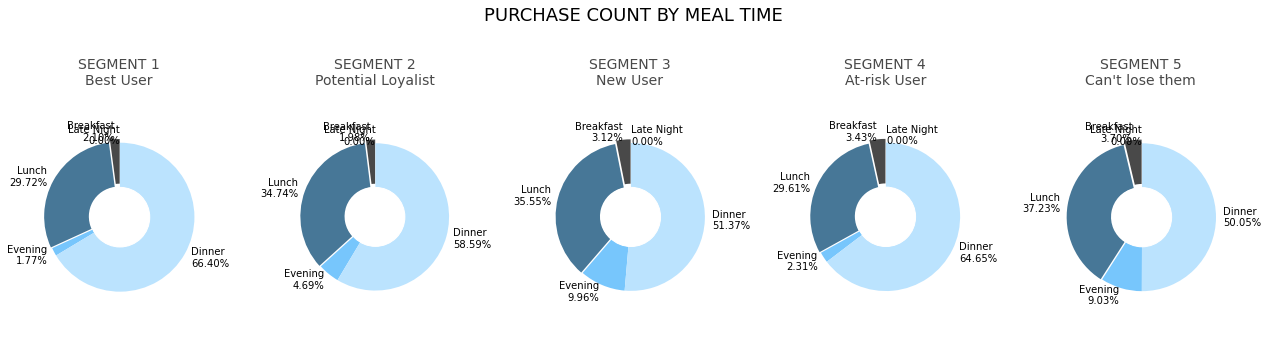

In [38]:
fig1, axes1 = plt.subplots(figsize=(18,5))
# add padding between the suplots
plt.subplots_adjust(right = 0.8, bottom = 0.1, hspace=0.1, wspace=0.3)
label2 =['Breakfast', 'Lunch', 'Evening', 'Dinner', 'Late Night']
explode3 = (0.05,0.02,0,0,0)
axes1.set_yticks([])
axes1.set_xticks([])
axes1.axis('off')
fig1.suptitle("PURCHASE COUNT BY MEAL TIME", fontsize=18)
nrows, ncols = 1, 5
for i in range(0,5):
    seg = RFM_df[RFM_df['USER_SEGMENT'] == choicelist[i]]
    sizes = [seg["BREAKFAST_PURCHASES"].sum(), seg["LUNCH_PURCHASES"].sum(), seg["EVENING_PURCHASES"].sum(),seg["DINNER_PURCHASES"].sum(), seg["LATE_NIGHT_PURCHASES"].sum()]
    pcts = [f'{l}\n{s*100/sum(sizes):.2f}%' for s,l in zip(sizes, label2)]
    ax = fig1.add_subplot(nrows, ncols, i+1)
    ax.set_title(f"SEGMENT {i+1}\n{choicelist[i]}", fontsize=14, color = font_color)
    ax.pie(sizes, wedgeprops=dict(width=0.6), explode = explode3, labels=pcts, shadow=False, startangle=90, colors = colors, textprops={'fontsize': 10})
    ax.axis('equal')
    # draw circle
    # add a circle at the center to transform it in a donut chart
    my_circle=plt.Circle((0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    fig = plt.gcf()
plt.tight_layout(pad = 2)
plt.show()

### 4.5 Purchase count by device

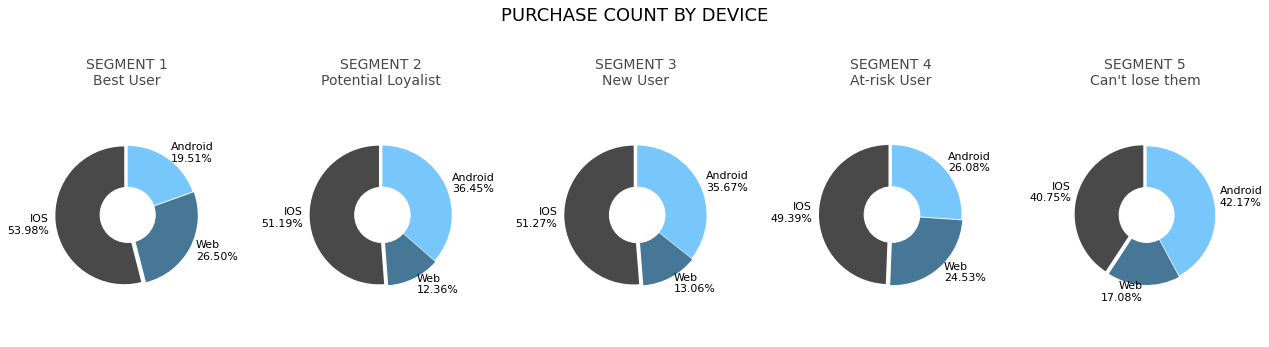

In [30]:
fig1, axes1 = plt.subplots(figsize=(18,5))
# add padding between the suplots
plt.subplots_adjust(right = 0.8, bottom = 0.1, hspace=0.1, wspace=0.3)
label3 =["IOS", "Web", "Android"]
explode3 = (0.05,0.02,0)
axes1.set_yticks([])
axes1.set_xticks([])
axes1.axis('off')
fig1.suptitle("PURCHASE COUNT BY DEVICE", fontsize=18)
nrows, ncols = 1, 5
for i in range(0,5):
    seg = RFM_df[RFM_df['USER_SEGMENT'] == choicelist[i]]
    sizes = [seg["IOS_PURCHASES"].sum(),seg["WEB_PURCHASES"].sum(),seg["ANDROID_PURCHASES"].sum()]
    pcts = [f'{l}\n{s*100/sum(sizes):.2f}%' for s,l in zip(sizes, label3)]
    width = 0.15
    ax = fig1.add_subplot(nrows, ncols, i+1)
    ax.set_title(f"SEGMENT {i+1}\n{choicelist[i]}", fontsize=14, color = font_color)
    ax.pie(sizes, wedgeprops=dict(width=0.7), explode = explode3, labels=pcts, shadow=False, startangle=90, colors = colors, textprops={'fontsize': 11})
    ax.axis('equal')
    # draw circle
    # add a circle at the center to transform it in a donut chart
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    fig = plt.gcf()
plt.tight_layout(pad = 2)
plt.show()

### 4.6 Purchase count by store types

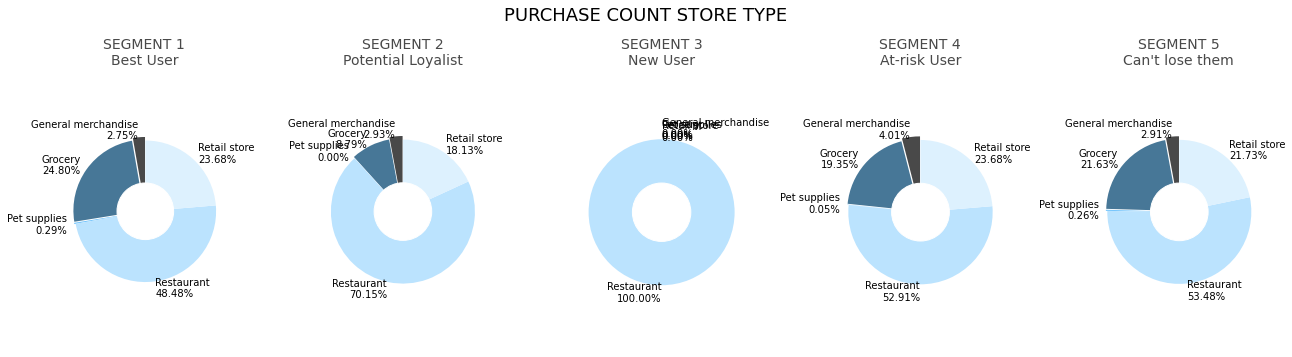

In [31]:
fig1, axes1 = plt.subplots(figsize=(18,5))
# add padding between the suplots
plt.subplots_adjust(bottom = 0.1, hspace=0.1, wspace=0.2)
label4 =['General merchandise', 'Grocery', 'Pet supplies', 'Restaurant','Retail store']
explode3 = (0.05,0.02,0.02,0,0)
axes1.set_yticks([])
axes1.set_xticks([])
axes1.axis('off')
fig1.suptitle("PURCHASE COUNT STORE TYPE", fontsize=18)
nrows, ncols = 1,5
for i in range(0,5):
    seg = RFM_df[RFM_df['USER_SEGMENT'] == choicelist[i]]
    sizes = [seg["General merchandise"].sum(),seg["Grocery"].sum(),seg["Pet supplies"].sum(), seg["Restaurant"].sum(), seg["Retail store"].sum()]
    pcts = [f'{l}\n{s*100/sum(sizes):.2f}%' for s,l in zip(sizes, label4)]
    width = 0.15
    ax = fig1.add_subplot(nrows, ncols, i+1)
    ax.set_title(f"SEGMENT {i+1}\n{choicelist[i]}", fontsize=14, color = font_color)
    ax.pie(sizes, explode = explode3, labels=pcts, shadow=False, startangle=90, colors = colors)
    ax.axis('equal')
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    fig = plt.gcf()
plt.tight_layout(pad = 1)
plt.show()

In [61]:
# Check max min of Monetary value 
RFM_df.describe()

,USER_ID,Monetary_Value,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,...,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,General merchandise,Grocery,Pet supplies,Restaurant,Retail store
count,12027.000000,12027.000000,12027.000000,12027.000000,12027.000000,12027.000000,12027.000000,12027.000000,12027.000000,12027.0,...,12027.000000,12027.000000,7832.000000,7832.000000,12027.000000,12027.000000,12027.000000,12027.000000,12027.000000,12027.000000
mean,11035.307225,31.194456,6.114576,5.742080,0.372495,0.193980,2.375156,0.493473,3.029267,0.0,...,11.502702,4.010227,64.293539,55.792135,5.961290,0.119897,1.056539,0.014551,3.715889,1.207699
std,6383.009231,20.717298,10.763410,10.536569,1.416365,1.104112,5.626398,1.827780,5.238354,0.0,...,6.930691,2.010072,72.570103,74.963336,3.466398,0.324854,3.938023,0.119750,5.147227,4.255548
min,2.000000,1.012000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,1.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5529.500000,19.228000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,5.000000,2.000000,18.000000,10.000000,2.950000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,11037.000000,27.324000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,...,12.000000,4.000000,39.500000,25.000000,5.930000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,16519.500000,38.456000,6.000000,6.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.0,...,18.000000,6.000000,81.000000,68.250000,8.978000,0.000000,0.000000,0.000000,4.000000,0.000000
max,21983.000000,657.800000,320.000000,320.000000,44.000000,52.000000,171.000000,71.000000,104.000000,0.0,...,23.000000,7.000000,421.000000,421.000000,11.999000,1.000000,110.000000,1.000000,160.000000,160.000000


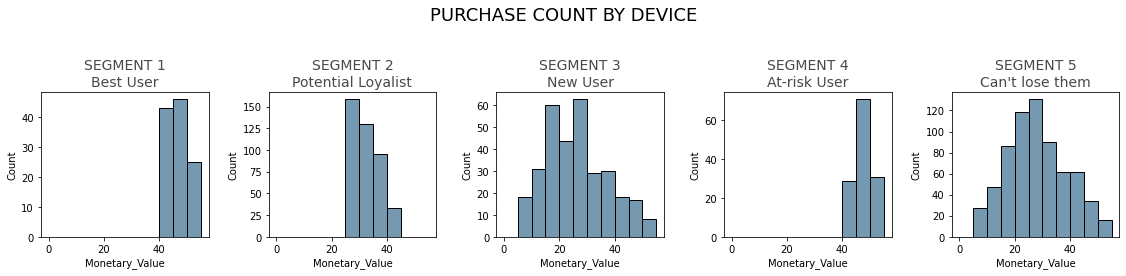

In [83]:
fig1, axes1 = plt.subplots(figsize=(16,4))
# add padding between the suplots
plt.subplots_adjust(right = 0.8, bottom = 0.1, hspace=0.2, wspace=0.3)
label3 =["IOS", "Web", "Android"]
explode3 = (0.05,0.02,0)
axes1.set_yticks([])
axes1.set_xticks([])
axes1.axis('off')
fig1.suptitle("Monetary Value By Segment", fontsize=18)
nrows, ncols = 1, 5
for i in range(0,5):

    seg = RFM_df[RFM_df['USER_SEGMENT'] == choicelist[i]]
    sizes = seg["AVG_PURCHASE_VALUE_EUR"]
    pcts = [f'{l}\n{s*100/sum(sizes):.2f}%' for s,l in zip(sizes, label3)]
    width = 0.15
    ax = fig1.add_subplot(nrows, ncols, i+1)
    ax.set_title(f"SEGMENT {i+1}\n{choicelist[i]}", fontsize=14, color = font_color)
    sns.histplot(data=seg, x="Monetary_Value", bins = range(0,60,5), ax=ax, color = colors[1] )

plt.tight_layout(pad = 2)
plt.show()

### 4.7 Common Time to Purchase

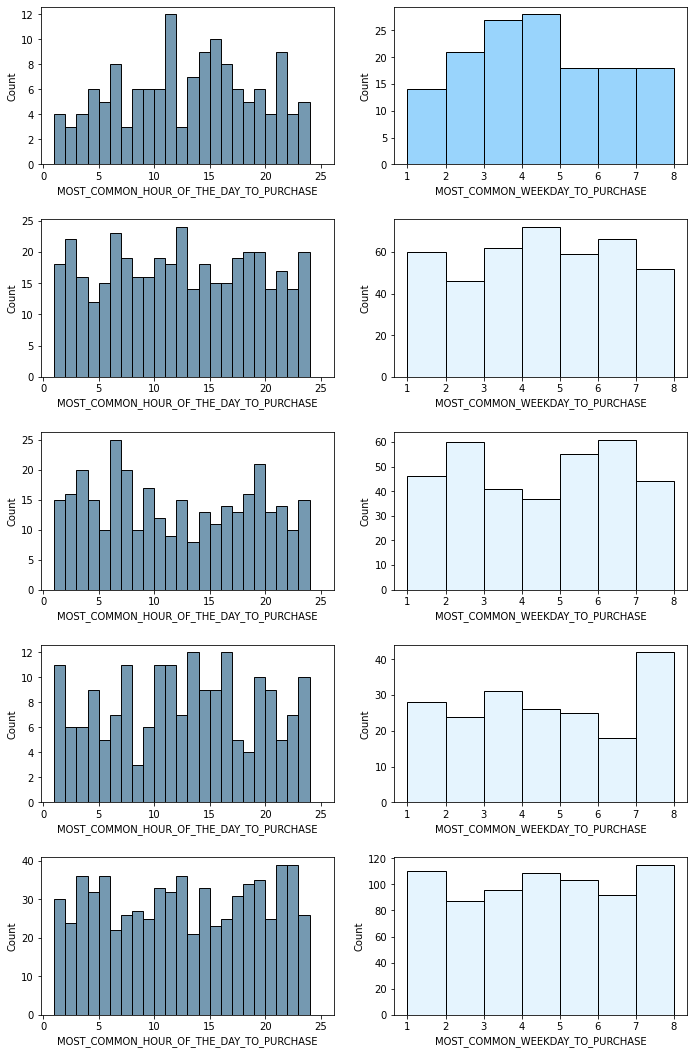

In [33]:
# initialize figure with 3 subplots in a row
fig, ax = plt.subplots(5, 2, figsize=(10, 15))
# add padding between the subplots
plt.subplots_adjust(wspace=0.2)
choicelist = ['Best User', 'Potential Loyalist', 'New User', 'At-risk User', "Can't lose them", "Others"]
# draw boxplot for Recency in the 1st subplot
sns.histplot(data=RFM_df[RFM_df['USER_SEGMENT'] == 'Best User'], x="MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE", ax=ax[0,0], bins=range(1, 26, 1), color = colors[1] )
sns.histplot(data=RFM_df[RFM_df['USER_SEGMENT'] == 'Best User'], x="MOST_COMMON_WEEKDAY_TO_PURCHASE", ax=ax[0,1], bins=range(1, 9, 1), color = colors[2] )

# draw boxplot for Recency in the 2nd subplot
sns.histplot(data=RFM_df[RFM_df['USER_SEGMENT'] == 'Potential Loyalist'], x="MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE", ax=ax[1,0], bins=range(1, 26, 1), color = colors[1] )
sns.histplot(data=RFM_df[RFM_df['USER_SEGMENT'] == 'Potential Loyalist'], x="MOST_COMMON_WEEKDAY_TO_PURCHASE", ax=ax[1,1], bins=range(1, 9, 1), color = colors[4] )

# draw boxplot for Recency in the 3rd subplot
sns.histplot(data=RFM_df[RFM_df['USER_SEGMENT'] == 'New User'], x="MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE", ax=ax[2,0], bins=range(1, 26, 1), color = colors[1] )
sns.histplot(data=RFM_df[RFM_df['USER_SEGMENT'] == 'New User'], x="MOST_COMMON_WEEKDAY_TO_PURCHASE", ax=ax[2,1], bins=range(1, 9, 1), color = colors[4] )

# draw boxplot for Recency in the 4th subplot
sns.histplot(data=RFM_df[RFM_df['USER_SEGMENT'] == 'At-risk User'], x="MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE", ax=ax[3,0], bins=range(1, 26, 1), color = colors[1] )
sns.histplot(data=RFM_df[RFM_df['USER_SEGMENT'] == 'At-risk User'], x="MOST_COMMON_WEEKDAY_TO_PURCHASE", ax=ax[3,1], bins=range(1, 9, 1), color = colors[4] )

# draw boxplot for Recency in the 5th subplot
sns.histplot(data=RFM_df[RFM_df['USER_SEGMENT'] == "Can't lose them"], x="MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE", ax=ax[4,0], bins=range(1, 26, 1), color = colors[1] )
sns.histplot(data=RFM_df[RFM_df['USER_SEGMENT'] == "Can't lose them"], x="MOST_COMMON_WEEKDAY_TO_PURCHASE", ax=ax[4,1], bins=range(1, 9, 1), color = colors[4] )

plt.tight_layout(pad = 2)
plt.show()